In [0]:
!pip install -q requests-cache

import requests_cache
requests_cache.install_cache(expire_after=timedelta(hours=1))

import os.path
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.style as style
from datetime import datetime, timedelta
from IPython.display import display

style.use('bmh')
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]

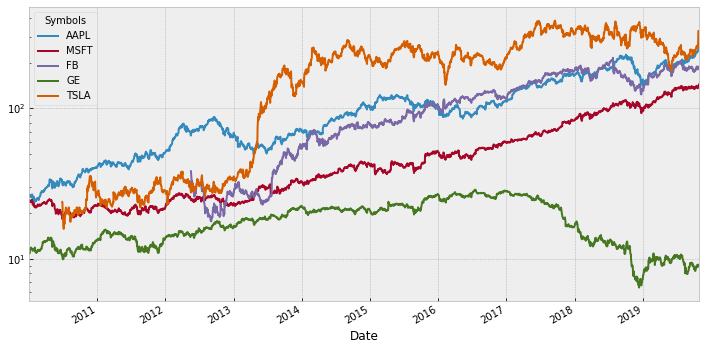

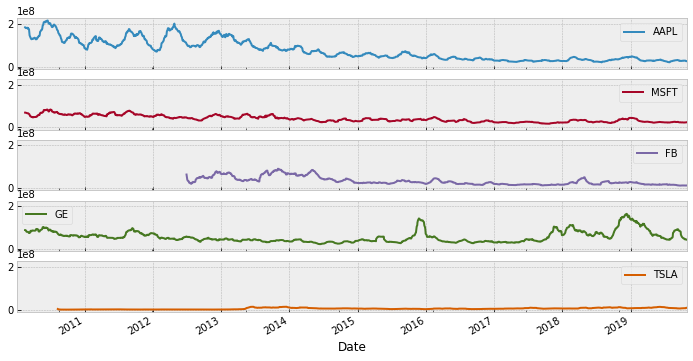

Attributes    High                        ... Adj Close                      
Symbols       AAPL    MSFT      FB    GE  ...      MSFT      FB    GE    TSLA
Date                                      ...                                
2019-10-22  242.20  140.01  190.65  9.06  ...    136.37  182.34  9.06  255.58
2019-10-23  243.24  137.45  186.38  9.15  ...    137.24  186.15  9.14  254.68
2019-10-24  244.80  140.42  186.73  9.15  ...    139.94  186.38  8.95  299.68
2019-10-25  246.73  141.14  189.00  9.09  ...    140.73  187.89  9.00  328.13
2019-10-28  249.25  145.67  189.53  9.12  ...    144.19  189.40  9.07  327.71

[5 rows x 30 columns]

In [103]:
start = '1 1 2010'
end = datetime.now()
symbols = ['AAPL', 'MSFT', 'FB', 'GE', 'TSLA']

df = pdr.DataReader(symbols, 'yahoo', start, end)

df['Adj Close'].plot(logy=True)
plt.show()

df['Volume'].rolling(30).mean().plot(subplots=True, sharey=True)
plt.show()

display(df.tail().round(2))

In [104]:
for symbol in df.axes[-1].levels[1]:
  print('>', symbol)
  display(df.stack(0)[symbol].unstack().tail().round(2))
  print()

> AAPL


Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-10-22,239.96,239.96,242.20,239.62,241.16,20573400.0
2019-10-23,243.18,243.18,243.24,241.22,242.10,18957200.0
2019-10-24,243.58,243.58,244.80,241.81,244.51,17318800.0
2019-10-25,246.58,246.58,246.73,242.88,243.16,18330500.0
2019-10-28,249.05,249.05,249.25,246.72,247.42,24112500.0



> MSFT


Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-10-22,136.37,136.37,140.01,136.26,138.97,27431000.0
2019-10-23,137.24,137.24,137.45,135.61,136.88,29844600.0
2019-10-24,139.94,139.94,140.42,138.67,139.39,37029300.0
2019-10-25,140.73,140.73,141.14,139.20,139.34,25274600.0
2019-10-28,144.19,144.19,145.67,143.51,144.40,35243000.0



> FB


Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-10-22,182.34,182.34,190.65,181.50,190.00,19537600.0
2019-10-23,186.15,186.15,186.38,182.00,182.01,12300400.0
2019-10-24,186.38,186.38,186.73,182.80,184.62,11413500.0
2019-10-25,187.89,187.89,189.00,185.09,185.83,8047400.0
2019-10-28,189.40,189.40,189.53,185.08,187.20,13640300.0



> GE


Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-10-22,9.06,9.06,9.06,8.61,8.77,57115100.0
2019-10-23,9.14,9.14,9.15,8.93,8.98,47584900.0
2019-10-24,8.95,8.95,9.15,8.88,9.12,34131700.0
2019-10-25,9.00,9.00,9.09,8.92,8.92,42143600.0
2019-10-28,9.07,9.07,9.12,8.99,9.02,31723300.0



> TSLA


Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-10-22,255.58,255.58,258.33,250.85,254.32,4600800.0
2019-10-23,254.68,254.68,256.14,251.35,254.50,5261100.0
2019-10-24,299.68,299.68,304.93,289.20,298.37,29720900.0
2019-10-25,328.13,328.13,330.00,296.11,297.72,29982400.0
2019-10-28,327.71,327.71,340.84,322.60,327.54,18860900.0
